<a href="https://www.kaggle.com/code/vijaykumarphy068/walmart-model-with-pipeline?scriptVersionId=120994876" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# walmart model with Pipeline preprocessing and training


In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [2]:
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /opt/conda/lib/python3.7/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: access, altair, arviz, beatrix-jupyterlab, bq-helper, bqplot, catboost, category-encoders, cesium, cmdstanpy, cufflinks, datasets, datashader, esda, fastai, featuretools, fitter, geopandas, geoplot, ggplot, gluoncv, hep-ml, holoviews, hypertools, ibis-framework, libpysal, mapclassify, mizani, mlcrate, mlxtend, nilearn, osmnx, pandarallel, pandas-datareader, pandas-profiling, pandas-summary, pandasql, PDPbox, phik, plotly-express, plotnine, pointpats, prophet, py-stringsimjoin, pyLDAvis, pymc3, PyUpSet, qgrid, scattertext, seaborn, segregation, shap, sklearn-pandas, spaghetti, spopt, spreg, spvcm, statsmodels, tensorflow-decision-forests, tfx-bsl, tobl

## Data download

In [3]:
!pip install scikit-learn==1.1.2

ERROR: Ignored the following versions that require a different python version: 1.1.0 Requires-Python >=3.8; 1.1.1 Requires-Python >=3.8; 1.1.2 Requires-Python >=3.8; 1.1.3 Requires-Python >=3.8; 1.2.0 Requires-Python >=3.8; 1.2.0rc1 Requires-Python >=3.8; 1.2.1 Requires-Python >=3.8
ERROR: Could not find a version that satisfies the requirement scikit-learn==1.1.2 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.0, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2)
ERROR: No matching distribution found for scikit-learn==1.1.2


In [4]:
!python3 --version


Python 3.7.12


In [5]:
!pip install  plotly.express --quiet

In [6]:
import os
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import plotly.express as px
from zipfile import ZipFile
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)




plt.style.use('seaborn-poster')
plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
!cp -r '../input/walmart-recruiting-store-sales-forecasting' "/kaggle/working/"

In [8]:
with ZipFile('../input/walmart-recruiting-store-sales-forecasting/train.csv.zip') as f:
    f.extractall(path='./walmart-recruiting-store-sales-forecasting')
    
with ZipFile('../input/walmart-recruiting-store-sales-forecasting/test.csv.zip') as f:
    f.extractall(path='./walmart-recruiting-store-sales-forecasting')
    
    
with ZipFile('../input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip') as f:
    f.extractall(path='./walmart-recruiting-store-sales-forecasting')
    

with ZipFile('../input/walmart-recruiting-store-sales-forecasting/features.csv.zip') as f:
    f.extractall(path='./walmart-recruiting-store-sales-forecasting')

In [9]:
os.listdir('walmart-recruiting-store-sales-forecasting')

['features.csv.zip',
 'features.csv',
 'train.csv.zip',
 'sampleSubmission.csv.zip',
 'sampleSubmission.csv',
 'stores.csv',
 'train.csv',
 'test.csv.zip',
 'test.csv']

In [10]:
train_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/train.csv')
store_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/stores.csv')
test_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/test.csv')
feature_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/features.csv')
Submission = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv')


In [11]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [12]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [13]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [14]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [17]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [18]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [19]:
feature_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [20]:
feature_df.drop(columns=[ 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5',],inplace=True)

combine data set

In [21]:
train = train_df.merge(store_df, how='left').merge(feature_df, how='left')
test = test_df.merge(store_df, how='left').merge(feature_df, how='left')

# EDA and preproccessing

In [22]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667


In [23]:
test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,NaN,NaN


In [24]:
types=train['Type'].value_counts(dropna=False)
fig=px.pie(types,names=types.index,values=types,title="Store types")
fig.show()

**Most of the store are of A type**

In [25]:
cat_cols=['IsHoliday','Type']

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1,subplot_titles=cat_cols)

for i,col in enumerate(cat_cols):
    
    train_cat_col=train[col].value_counts().to_frame()/len(train)
    test_cat_col=test[col].value_counts().to_frame()/len(test)
    
    fig.add_trace(
        go.Bar(x=train_cat_col.index, y=train_cat_col[col],name ='train'+' '+col,legendgroup = i),
        row=i+1, col=1,)
    
    
    fig.add_trace(
        go.Bar(x=test_cat_col.index, y=test_cat_col[col],name ='test'+' '+col,legendgroup = i),
        row=i+1, col=1)
    
    

fig.update_layout(height=800, width=1000, title_text="plots of categorial data from train and test",legend_tracegroupgap=340)




**insights**
* for categorical Data distribution remain same for train and test Data

In [26]:
train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000


In [27]:
test.describe()

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,76902.000000,76902.000000
mean,22.238207,44.339524,136497.688921,53.941804,3.581546,176.961347,6.868733
std,12.809930,30.656410,61106.926438,18.724153,0.239442,41.239967,1.583427
min,1.000000,1.000000,34875.000000,-7.290000,2.872000,131.236226,3.684000
25%,11.000000,18.000000,93638.000000,39.820000,3.431000,138.402033,5.771000
50%,22.000000,37.000000,140167.000000,54.470000,3.606000,192.304445,6.806000
75%,33.000000,74.000000,202505.000000,67.350000,3.766000,223.244532,8.036000
max,45.000000,99.000000,219622.000000,101.950000,4.125000,228.976456,10.199000


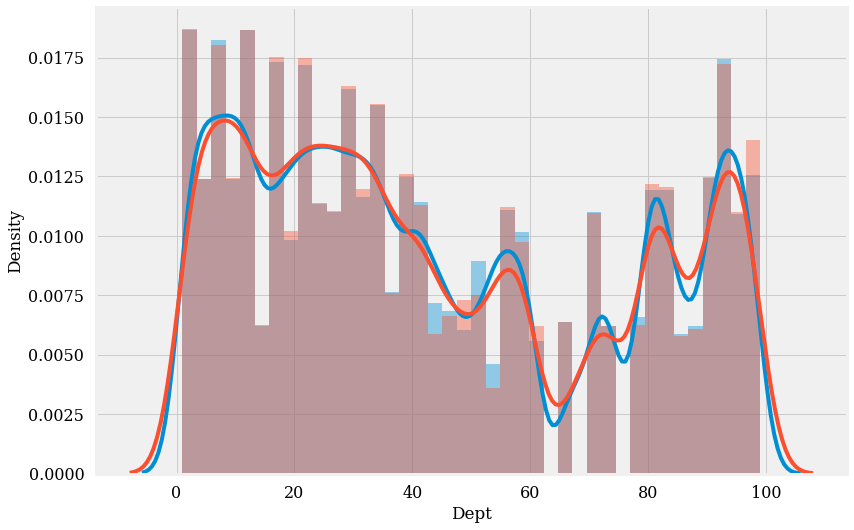

In [28]:
sns.distplot(train['Dept'], kde=True, bins=40,)
sns.distplot(test['Dept'],  kde=True, bins=40 )
plt.show()

<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

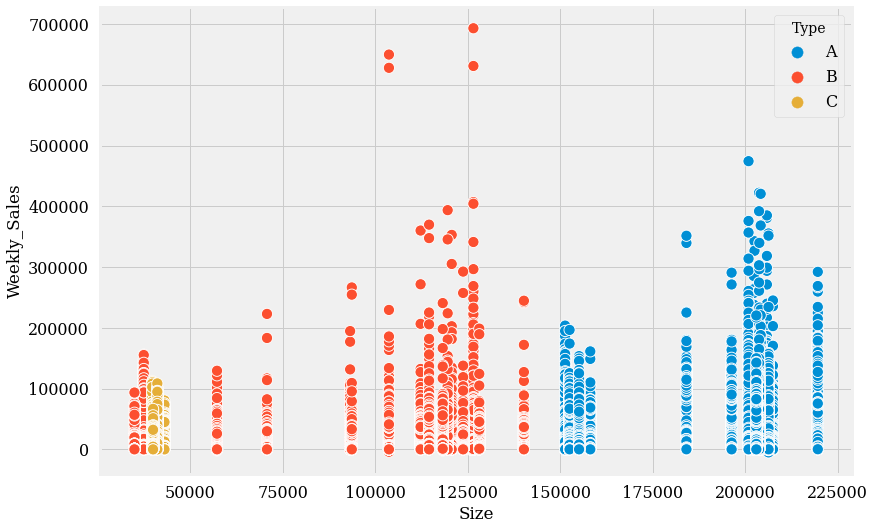

In [29]:
sns.scatterplot(data=train,x='Size',y='Weekly_Sales',hue='Type')

**insights**
* As the size of store increases sales also increases 
* we can see three clusters means `Size` of store depend upon  `Type` of store

In [30]:
avg_sales  = train.groupby('Type')['Weekly_Sales'].mean().to_frame().reset_index()

 
px.bar(avg_sales,x='Type',y='Weekly_Sales')

**insights**
* A Type store done most of the sales

In [31]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

# columns  preproccessing

* Make a funtion to extract weeks months years from date column so that we can make pipeline easily 

## **step 1 of pipeline**

In [32]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [33]:
break_date1 = pd.Timestamp("2011-06-05")
break_date2 = pd.Timestamp("2012-06-05")


train_df1 = train[train["Date"] <= break_date1]
test_df1 = train.loc[(train["Date"] > break_date1) & (train["Date"] <= break_date2)]
val_df = train[train["Date"] > break_date2]

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 35.8+ MB


In [35]:
## step 1

def extract_week(df):
    Date='Date'
    df[Date] =  pd.to_datetime(df[Date], infer_datetime_format=True)
    df['week'] = pd.DatetimeIndex(df[Date]).week
    df['month'] = pd.DatetimeIndex(df[Date]).month
    df['year'] = pd.DatetimeIndex(df[Date]).year  
    
    return df

In [36]:
#Date="Date"
extract_week(train)
extract_week(train_df1)
extract_week(test_df1)
extract_week(val_df)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
122,1,1,2012-06-08,17666.00,False,A,151315,78.30,3.452,221.749484,7.143,23,6,2012
123,1,1,2012-06-15,17558.82,False,A,151315,79.35,3.393,221.762642,7.143,24,6,2012
124,1,1,2012-06-22,16633.41,False,A,151315,78.39,3.346,221.803021,7.143,25,6,2012
125,1,1,2012-06-29,15722.82,False,A,151315,84.88,3.286,221.843400,7.143,26,6,2012
126,1,1,2012-07-06,17823.37,False,A,151315,81.57,3.227,221.883779,6.908,27,7,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,42,10,2012


In [37]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,42,10,2012


Text(0, 0.5, 'Sales')

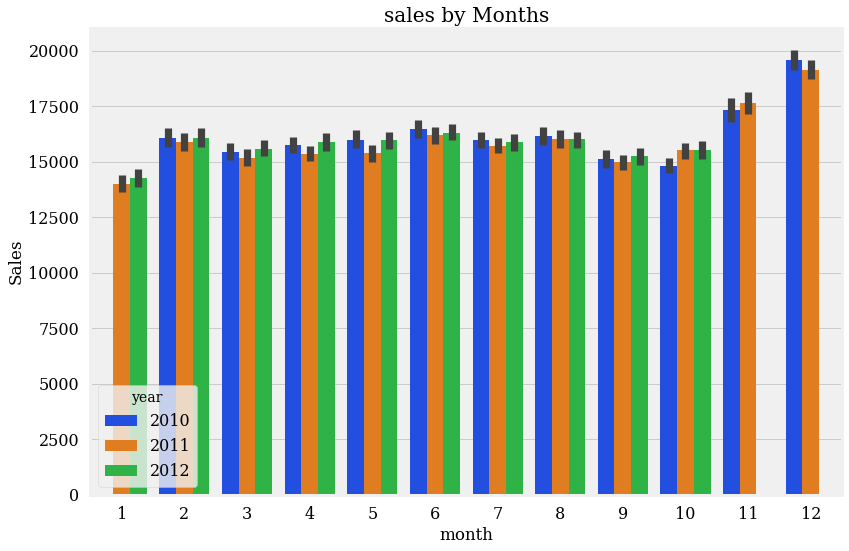

In [38]:
sns.barplot(data=train,x='month',y='Weekly_Sales',hue='year',palette='bright').set_title('sales by Months')
plt.ylabel('Sales')

**insights**
* only slight variation in sales with respect year 
* In 2011 sales are relatively lower than both 2010 and 2012
* In first month sales are least and in 12th month sales are higher .May be due to festivals

In [39]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'week', 'month',
       'year'],
      dtype='object')

Text(0.5, 1.0, 'sales by weeks')

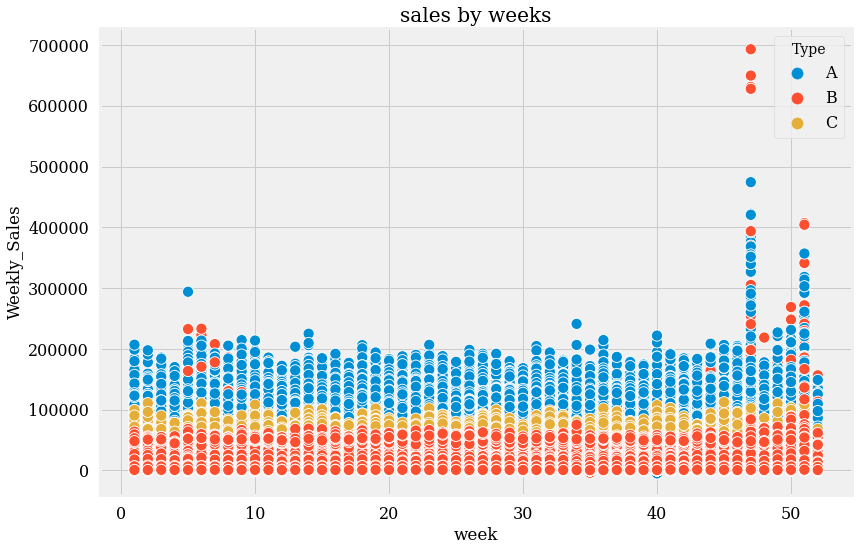

In [40]:
sns.scatterplot(data=train,
                y='Weekly_Sales',
                x='week',
                hue='Type').set_title('sales by weeks')

Text(0.5, 1.0, 'is sales depend  on fuel price?')

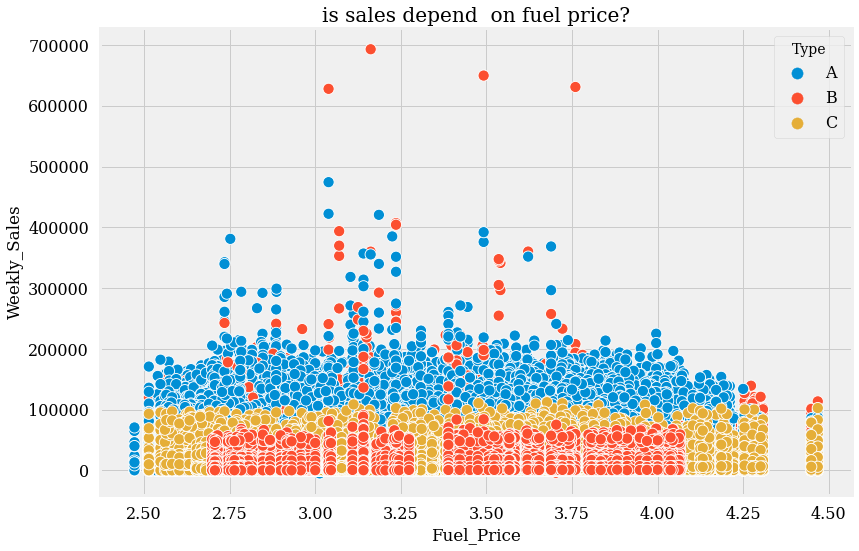

In [41]:
sns.scatterplot(data=train,y='Weekly_Sales',x='Fuel_Price',hue='Type').set_title('is sales depend  on fuel price?')

**insights**
* sales does not depend on fuel price

Text(0.5, 1.0, 'is sales depend on temp')

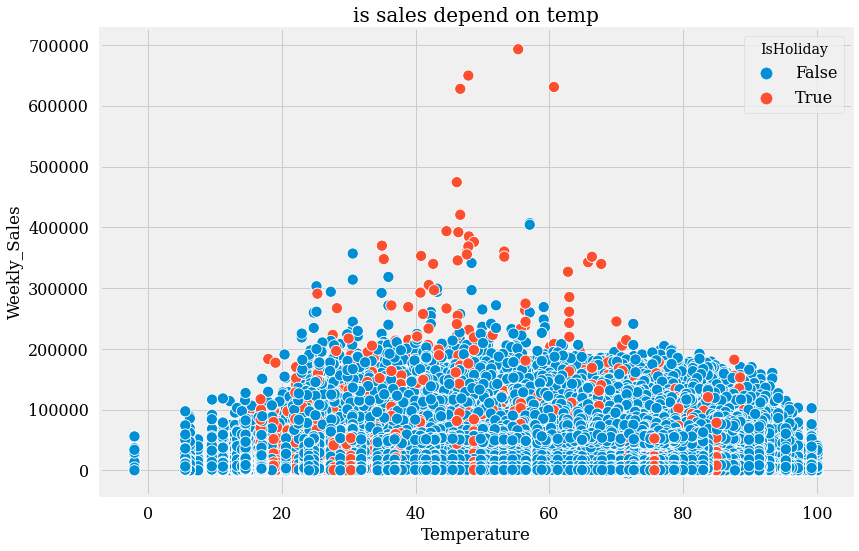

In [42]:
sns.scatterplot(data=train,y='Weekly_Sales',x='Temperature',hue='IsHoliday').set_title('is sales depend on temp')

**insights**
* sales does not depend on Temp only at too high and too low conditions sales are less

Text(0.5, 1.0, 'sales vs Unemployment')

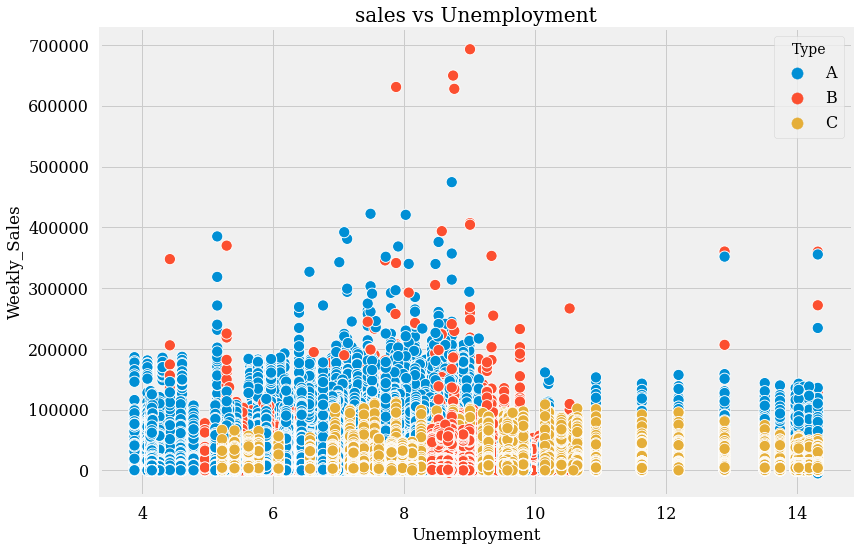

In [43]:
sns.scatterplot(data=train,y='Weekly_Sales',x='Unemployment',hue='Type').set_title('sales vs Unemployment')

**insights**
* Only slightly change in sales as the unemployment increases

Text(0.5, 1.0, 'sales vs CPI')

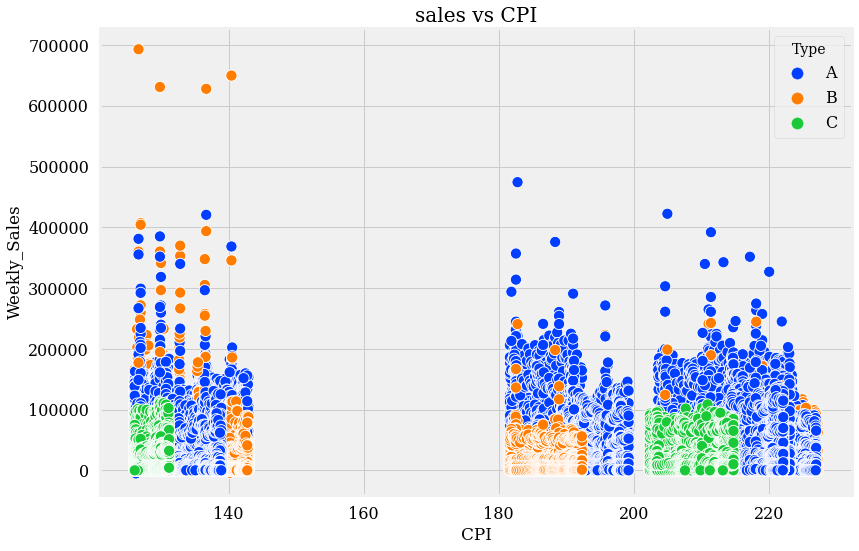

In [44]:
sns.scatterplot(data=train,
                y='Weekly_Sales',
                x='CPI',hue='Type',
                palette='bright').set_title('sales vs CPI')

**insights**
* CPI does not affect sales

Text(0.5, 1.0, 'sales vs Dept')

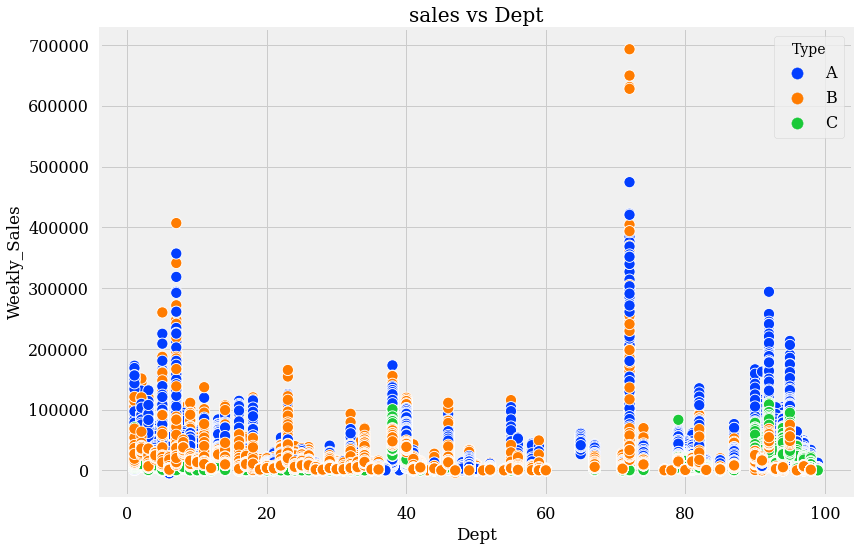

In [45]:
sns.scatterplot(data=train,
                y='Weekly_Sales',
                x='Dept',hue='Type',
                palette='bright').set_title('sales vs Dept')

**insights**
* Dept does  affect sales
* Different department have different sales 

In [46]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,42,10,2012


In [47]:
test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,NaN,NaN


## **pipe line step 2**

In [48]:
# step 2

def maping_type(df):
    # map Type 
    df['Type'] = df['Type'].map({'A':'1',
                                 'B':'2',
                                 'C':'3'})
    return df


In [49]:
maping_type(train)
maping_type(train_df1)
maping_type(val_df)
maping_type(test_df1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
70,1,1,2011-06-10,15883.52,False,1,151315,83.13,3.648,215.043523,7.682,23,6,2011
71,1,1,2011-06-17,14978.09,False,1,151315,86.41,3.637,214.998060,7.682,24,6,2011
72,1,1,2011-06-24,15682.81,False,1,151315,83.58,3.594,215.091098,7.682,25,6,2011
73,1,1,2011-07-01,15363.50,False,1,151315,85.55,3.524,215.184137,7.962,26,7,2011
74,1,1,2011-07-08,16148.87,False,1,151315,85.83,3.480,215.277175,7.962,27,7,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421544,45,98,2012-05-04,694.25,False,2,118221,55.21,3.951,190.922212,8.567,18,5,2012
421545,45,98,2012-05-11,893.60,False,2,118221,61.24,3.889,190.976417,8.567,19,5,2012
421546,45,98,2012-05-18,745.44,False,2,118221,66.30,3.848,190.996448,8.567,20,5,2012
421547,45,98,2012-05-25,795.94,False,2,118221,67.21,3.798,191.002810,8.567,21,5,2012


## **pipeline step 3**

In [50]:
def convert_to_int(df):
    ## convert them into integer  
    df['Type']=df['Type'].astype(int)
    df['IsHoliday']=df['IsHoliday'].astype(int)
    return df
    

In [51]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205416 entries, 0 to 421496
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         205416 non-null  int64         
 1   Dept          205416 non-null  int64         
 2   Date          205416 non-null  datetime64[ns]
 3   Weekly_Sales  205416 non-null  float64       
 4   IsHoliday     205416 non-null  bool          
 5   Type          205416 non-null  object        
 6   Size          205416 non-null  int64         
 7   Temperature   205416 non-null  float64       
 8   Fuel_Price    205416 non-null  float64       
 9   CPI           205416 non-null  float64       
 10  Unemployment  205416 non-null  float64       
 11  week          205416 non-null  int64         
 12  month         205416 non-null  int64         
 13  year          205416 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(6), object(1)
memor

In [52]:
convert_to_int(train)
convert_to_int(train_df1)
convert_to_int(test_df1)
convert_to_int(val_df)



,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
122,1,1,2012-06-08,17666.00,0,1,151315,78.30,3.452,221.749484,7.143,23,6,2012
123,1,1,2012-06-15,17558.82,0,1,151315,79.35,3.393,221.762642,7.143,24,6,2012
124,1,1,2012-06-22,16633.41,0,1,151315,78.39,3.346,221.803021,7.143,25,6,2012
125,1,1,2012-06-29,15722.82,0,1,151315,84.88,3.286,221.843400,7.143,26,6,2012
126,1,1,2012-07-06,17823.37,0,1,151315,81.57,3.227,221.883779,6.908,27,7,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,8.667,42,10,2012


In [53]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,8.667,42,10,2012


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  week          421570 non-null  int64         
 12  month         421570 non-null  int64         
 13  year          421570 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 64.4 MB


# Training model


In [55]:
## From EDA select important columns
input_col = ['Store', 'IsHoliday', 'Type', 'Size', 'week','Dept','year']
target = ['Weekly_Sales']

In [56]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'week', 'month',
       'year'],
      dtype='object')

In [57]:
y=train_df1[target]

test_y=test_df1[target]
val_y=val_df[target]



**step 3 for pipe line**

In [58]:
def input_col_sel(df):
    #df.drop(columns=temp3,inplace=True)
    return df[input_col]

In [59]:
train_df1=input_col_sel(train_df1)
test_df1=input_col_sel(test_df1)
val_df=input_col_sel(val_df)



In [60]:
train_df1

,Store,IsHoliday,Type,Size,week,Dept,year
0,1,0,1,151315,5,1,2010
1,1,1,1,151315,6,1,2010
2,1,0,1,151315,7,1,2010
3,1,0,1,151315,8,1,2010
4,1,0,1,151315,9,1,2010
...,...,...,...,...,...,...,...
421492,45,0,2,118221,18,98,2011
421493,45,0,2,118221,19,98,2011
421494,45,0,2,118221,20,98,2011
421495,45,0,2,118221,21,98,2011


In [61]:
train[input_col]

,Store,IsHoliday,Type,Size,week,Dept,year
0,1,0,1,151315,5,1,2010
1,1,1,1,151315,6,1,2010
2,1,0,1,151315,7,1,2010
3,1,0,1,151315,8,1,2010
4,1,0,1,151315,9,1,2010
...,...,...,...,...,...,...,...
421565,45,0,2,118221,39,98,2012
421566,45,0,2,118221,40,98,2012
421567,45,0,2,118221,41,98,2012
421568,45,0,2,118221,42,98,2012


In [62]:
train_df1

,Store,IsHoliday,Type,Size,week,Dept,year
0,1,0,1,151315,5,1,2010
1,1,1,1,151315,6,1,2010
2,1,0,1,151315,7,1,2010
3,1,0,1,151315,8,1,2010
4,1,0,1,151315,9,1,2010
...,...,...,...,...,...,...,...
421492,45,0,2,118221,18,98,2011
421493,45,0,2,118221,19,98,2011
421494,45,0,2,118221,20,98,2011
421495,45,0,2,118221,21,98,2011


In [63]:
val_df

,Store,IsHoliday,Type,Size,week,Dept,year
122,1,0,1,151315,23,1,2012
123,1,0,1,151315,24,1,2012
124,1,0,1,151315,25,1,2012
125,1,0,1,151315,26,1,2012
126,1,0,1,151315,27,1,2012
...,...,...,...,...,...,...,...
421565,45,0,2,118221,39,98,2012
421566,45,0,2,118221,40,98,2012
421567,45,0,2,118221,41,98,2012
421568,45,0,2,118221,42,98,2012


In [64]:
train[train['Date']>break_date1]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
70,1,1,2011-06-10,15883.52,0,1,151315,83.13,3.648,215.043523,7.682,23,6,2011
71,1,1,2011-06-17,14978.09,0,1,151315,86.41,3.637,214.998060,7.682,24,6,2011
72,1,1,2011-06-24,15682.81,0,1,151315,83.58,3.594,215.091098,7.682,25,6,2011
73,1,1,2011-07-01,15363.50,0,1,151315,85.55,3.524,215.184137,7.962,26,7,2011
74,1,1,2011-07-08,16148.87,0,1,151315,85.83,3.480,215.277175,7.962,27,7,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,8.667,42,10,2012


In [65]:
y

,Weekly_Sales
0,24924.50
1,46039.49
2,41595.55
3,19403.54
4,21827.90
...,...
421492,669.07
421493,770.47
421494,846.44
421495,1369.21


In [66]:

train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205416 entries, 0 to 421496
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Store      205416 non-null  int64
 1   IsHoliday  205416 non-null  int64
 2   Type       205416 non-null  int64
 3   Size       205416 non-null  int64
 4   week       205416 non-null  int64
 5   Dept       205416 non-null  int64
 6   year       205416 non-null  int64
dtypes: int64(7)
memory usage: 12.5 MB


In [67]:
def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

# Import model

In [68]:
#y['Weekly_Sales']

# input_cols = ['Store', 'IsHoliday', 'Type', 'Size', 'week', 'Dept', 'year','CPI']

# train_df1[input_cols]
# val_df[input_cols]

In [69]:
## fiting model

# Create and train the model
rnd = RandomForestRegressor(max_depth=14, random_state=42).fit(train_df1, y['Weekly_Sales'])

train_preds = rnd.predict(train_df1)

train_wmae = WMAE(train_df1, y['Weekly_Sales'], train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))


val_preds = rnd.predict(val_df)


val_wmae = WMAE(val_df, val_y['Weekly_Sales'], val_preds)
print('The WMAE loss for the val set is  {}.'.format(val_wmae))


'''
val_preds = model.predict(val_X)
val_wmae = WMAE(val_X, val_y['Weekly_Sales'], val_preds)
print('The WMAE loss for the val set is  {}.'.format(val_wmae))
'''


The WMAE loss for the training set is  2170.7.
The WMAE loss for the val set is  2719.15.


"\nval_preds = model.predict(val_X)\nval_wmae = WMAE(val_X, val_y['Weekly_Sales'], val_preds)\nprint('The WMAE loss for the val set is  {}.'.format(val_wmae))\n"

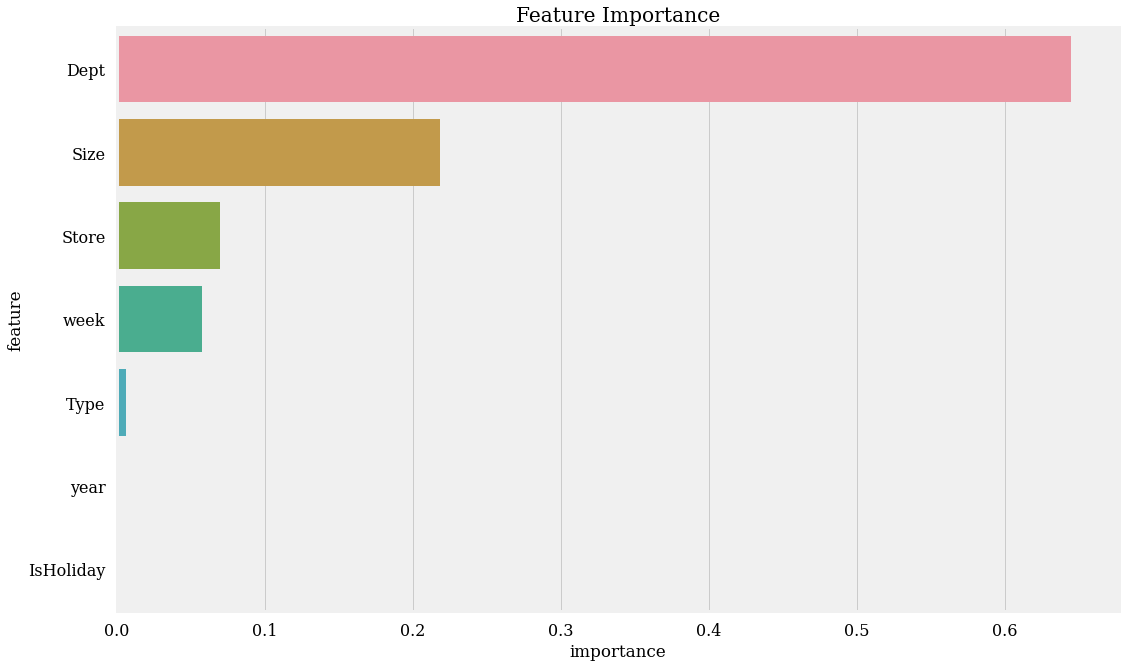

In [70]:
importance_df = pd.DataFrame({
    'feature': train_df1.columns,
    'importance': rnd.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

#### LinearRegression

In [71]:
## fiting model

# Create and train the model
model = LinearRegression().fit(train_df1, y['Weekly_Sales'])

train_preds = model.predict(train_df1)

train_wmae = WMAE(train_df1, y['Weekly_Sales'], train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))


val_preds = model.predict(val_df)


val_wmae = WMAE(val_df, val_y['Weekly_Sales'], val_preds)
print('The WMAE loss for the val set is  {}.'.format(val_wmae))





The WMAE loss for the training set is  14651.68.
The WMAE loss for the val set is  14666.28.


#### DecisionTreeRegressor

In [72]:
## fiting model

# Create and train the model
tree = DecisionTreeRegressor().fit(train_df1, y['Weekly_Sales'])

train_preds = model.predict(train_df1)

train_wmae = WMAE(train_df1, y['Weekly_Sales'], train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))


val_preds = model.predict(val_df)


val_wmae = WMAE(val_df, val_y['Weekly_Sales'], val_preds)
print('The WMAE loss for the val set is  {}.'.format(val_wmae))







The WMAE loss for the training set is  14651.68.
The WMAE loss for the val set is  14666.28.


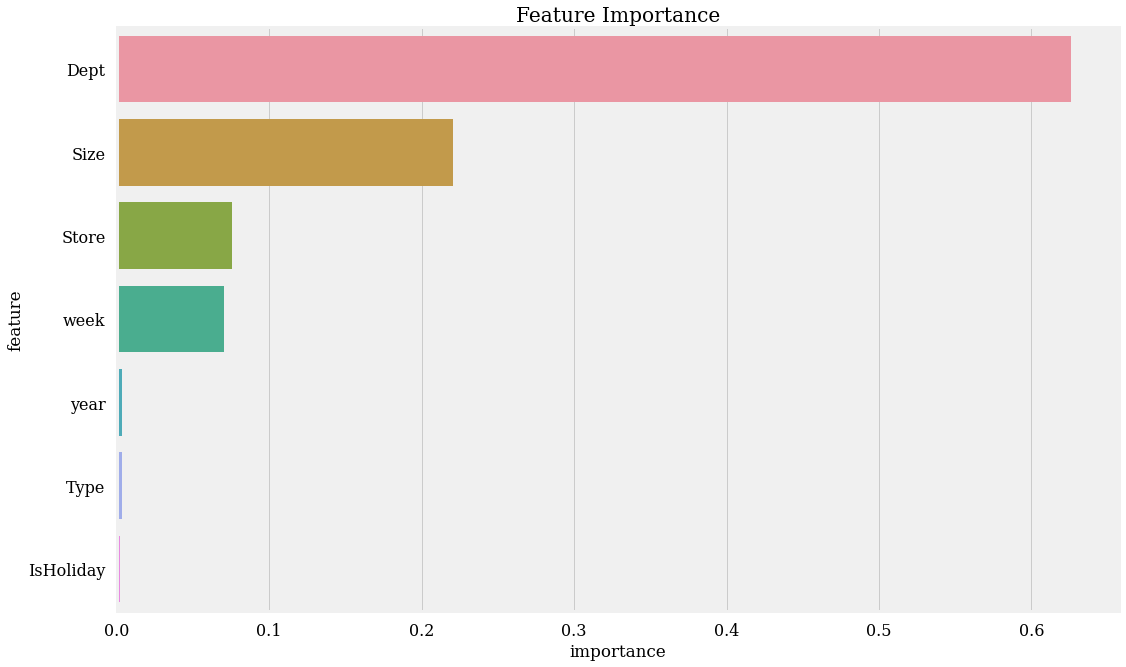

In [73]:
importance_df = pd.DataFrame({
    'feature': train_df1.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [74]:
!pip install xgboost lightgbm --upgrade --quiet


####  XGBRegressor


In [75]:
from xgboost import XGBRegressor

# Create the model XGBRegressor
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
gbm.fit( train_df1 , y['Weekly_Sales'])

train_preds = gbm.predict(train_df1)


train_wmae = WMAE(train_df1, y['Weekly_Sales'], train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))


val_preds = gbm.predict(val_df)


val_wmae = WMAE(val_df, val_y['Weekly_Sales'], val_preds)
print('The WMAE loss for the val set is  {}.'.format(val_wmae))







The WMAE loss for the training set is  2933.65.
The WMAE loss for the val set is  3237.34.


In [76]:
from xgboost import XGBRegressor

# Create the model XGBRegressor
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
gbm.fit( train[input_col] , train['Weekly_Sales'])

train_preds = gbm.predict(train[input_col])

train_wmae = WMAE(train[input_col], train['Weekly_Sales'], train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))






The WMAE loss for the training set is  3066.03.


In [77]:
preds = gbm.predict(val_df)

# Random forest hyperparameter tunning
* it gives best score from all above models

In [78]:
# helper funtion to test parameter values quickly

def test_params(**params):
    rnd = RandomForestRegressor(n_jobs=-1, random_state=42, **params)
    rnd.fit(train_df1, y['Weekly_Sales'])
    train_wmae = WMAE(train_df1, y['Weekly_Sales'],rnd.predict(train_df1))
    val_wmae = WMAE(val_df,val_y['Weekly_Sales'],rnd.predict(val_df))
    print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))
    return train_wmae,val_wmae

In [79]:
test_params(max_depth=10)

Train WMAE: 4309.95, Validation WMAE: 4290.63


(4309.95, 4290.63)

In [80]:
test_params(max_depth=20)

Train WMAE: 883.38, Validation WMAE: 1979.3


(883.38, 1979.3)

In [81]:
test_params(max_depth=25)

Train WMAE: 654.88, Validation WMAE: 1939.41


(654.88, 1939.41)

In [82]:
test_params(max_depth=30)


Train WMAE: 628.1, Validation WMAE: 1940.25


(628.1, 1940.25)

In [83]:
# Helper funtion to plot and check parameter values


def test_params_and_plot(param_name,values):
    train_errors , val_errors = [] , []
    for value in values:
        params = {param_name: value}
        train_wmae,val_wmae = test_params(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve:  params')
    plt.plot(values, train_errors, 'g-*')
    plt.plot(values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])
   

    

Train WMAE: 9403.41, Validation WMAE: 9021.75
Train WMAE: 4309.95, Validation WMAE: 4290.63
Train WMAE: 1823.22, Validation WMAE: 2468.02
Train WMAE: 883.38, Validation WMAE: 1979.3
Train WMAE: 654.88, Validation WMAE: 1939.41
Train WMAE: 628.1, Validation WMAE: 1940.25
Train WMAE: 627.58, Validation WMAE: 1940.56


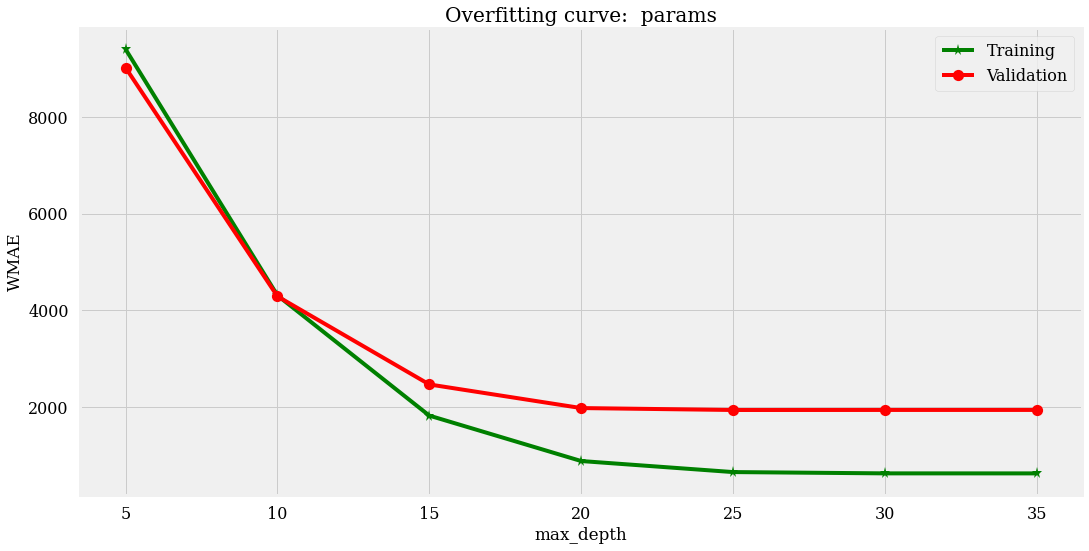

In [84]:
test_params_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

Train WMAE: 627.55, Validation WMAE: 1941.06
Train WMAE: 745.51, Validation WMAE: 1944.05
Train WMAE: 854.51, Validation WMAE: 1952.04
Train WMAE: 947.85, Validation WMAE: 1958.13
Train WMAE: 1023.54, Validation WMAE: 1963.69


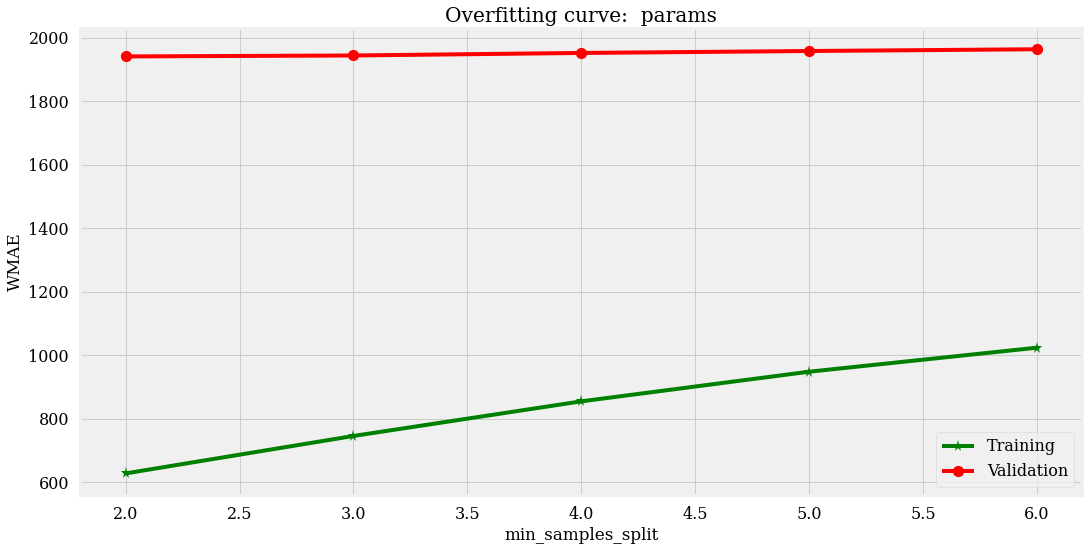

In [85]:
test_params_and_plot('min_samples_split',[ 2, 3, 4, 5, 6])


Train WMAE: 627.55, Validation WMAE: 1941.06
Train WMAE: 1020.34, Validation WMAE: 1978.53
Train WMAE: 1232.85, Validation WMAE: 2006.03


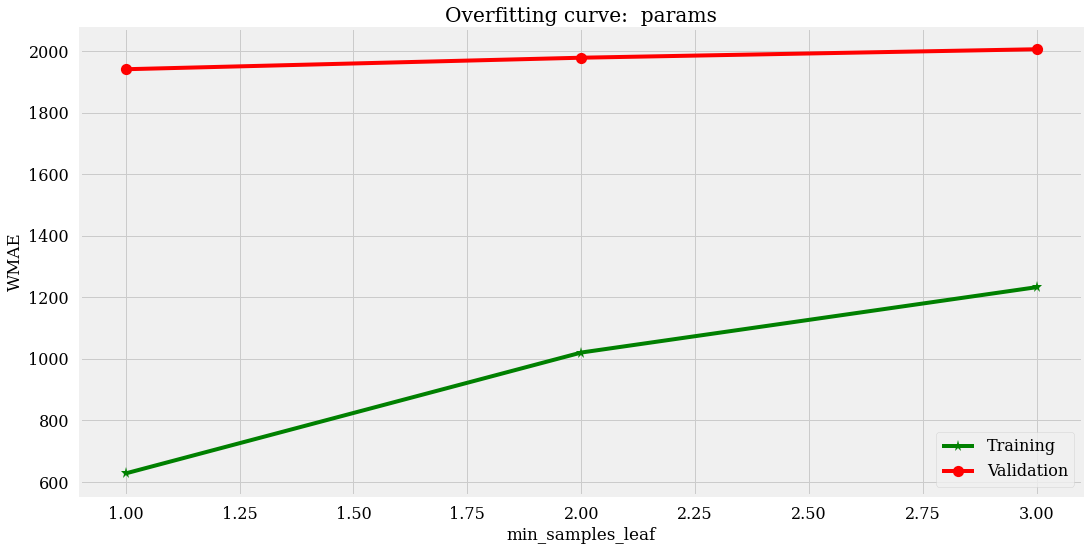

In [86]:
test_params_and_plot('min_samples_leaf',[ 1,2, 3])


Train WMAE: 1770.67, Validation WMAE: 3638.52
Train WMAE: 1069.39, Validation WMAE: 2794.79
Train WMAE: 728.56, Validation WMAE: 2300.47
Train WMAE: 636.58, Validation WMAE: 2057.43
Train WMAE: 624.57, Validation WMAE: 1963.23


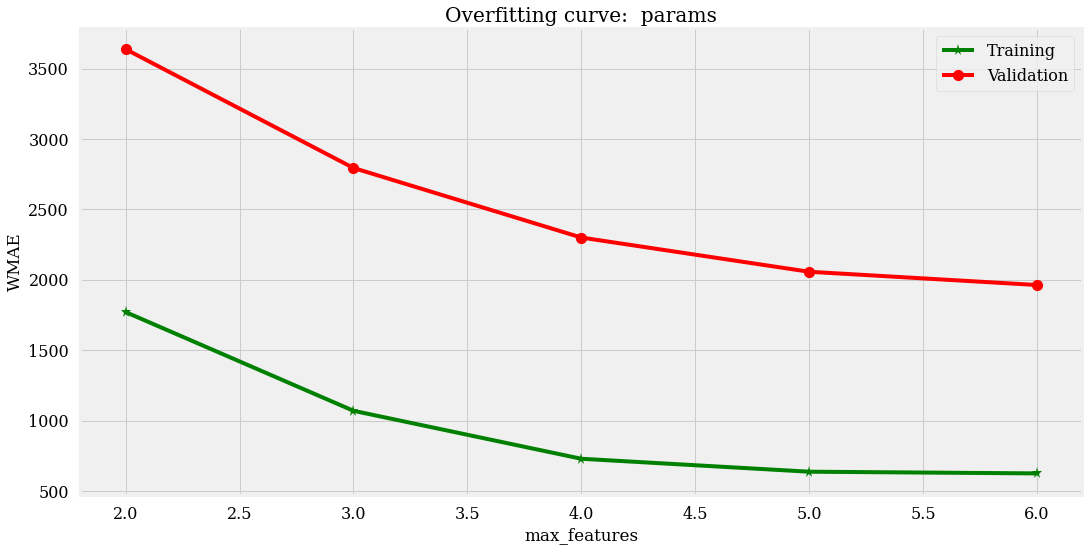

In [87]:
test_params_and_plot('max_features',[2,3,4,5,6 ])


Train WMAE: 5886.2, Validation WMAE: 5283.17
Train WMAE: 3377.24, Validation WMAE: 3140.0
Train WMAE: 2479.57, Validation WMAE: 2543.47
Train WMAE: 2119.66, Validation WMAE: 2331.9
Train WMAE: 1906.35, Validation WMAE: 2237.76
Train WMAE: 1782.03, Validation WMAE: 2181.65
Train WMAE: 1680.16, Validation WMAE: 2130.43
Train WMAE: 1604.02, Validation WMAE: 2108.43
Train WMAE: 1410.57, Validation WMAE: 2043.24
Train WMAE: 1048.27, Validation WMAE: 1967.08
Train WMAE: 857.26, Validation WMAE: 1945.4
Train WMAE: 708.14, Validation WMAE: 1938.79


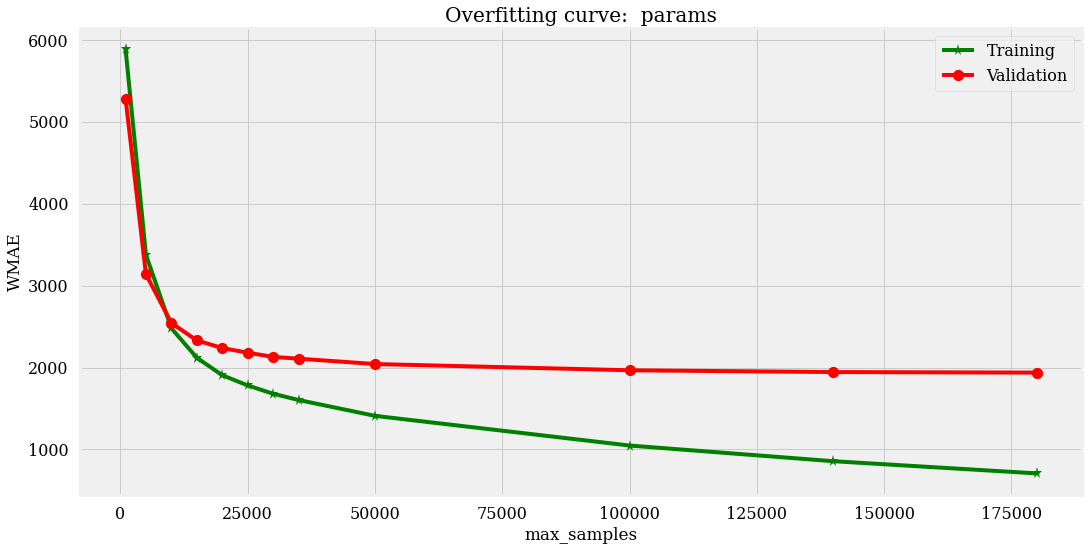

In [88]:
test_params_and_plot('max_samples',[1000,5000,10000,15000,20000,25000,30000,35000,50000,100000,140000,180000])


In [89]:
test_params(max_samples=120000)


Train WMAE: 946.4, Validation WMAE: 1954.48


(946.4, 1954.48)

In [90]:
test_params(max_samples=140000)


Train WMAE: 857.26, Validation WMAE: 1945.4


(857.26, 1945.4)

In [91]:
test_params(max_samples=160000)


Train WMAE: 779.45, Validation WMAE: 1944.05


(779.45, 1944.05)

In [92]:
test_params(max_samples=180000)


Train WMAE: 708.14, Validation WMAE: 1938.79


(708.14, 1938.79)

In [93]:
test_params(max_samples=200000)


Train WMAE: 642.88, Validation WMAE: 1939.47


(642.88, 1939.47)

* max_depth should be 25
* max_features should be 6
* max_sample should be 160000

In [94]:
## fiting model

# Create and train the model
rnd = RandomForestRegressor( random_state=42,max_samples=160000
                            ,max_features=6,max_depth=25).fit(train_df1, y['Weekly_Sales'])

train_preds = rnd.predict(train_df1)

train_wmae = WMAE(train_df1, y['Weekly_Sales'], train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))


val_preds = rnd.predict(val_df)


val_wmae = WMAE(val_df, val_y['Weekly_Sales'], val_preds)
print('The WMAE loss for the val set is  {}.'.format(val_wmae))


'''
val_preds = model.predict(val_X)
val_wmae = WMAE(val_X, val_y['Weekly_Sales'], val_preds)
print('The WMAE loss for the val set is  {}.'.format(val_wmae))
'''


The WMAE loss for the training set is  794.12.
The WMAE loss for the val set is  1962.68.


"\nval_preds = model.predict(val_X)\nval_wmae = WMAE(val_X, val_y['Weekly_Sales'], val_preds)\nprint('The WMAE loss for the val set is  {}.'.format(val_wmae))\n"

In [95]:
# test_preds = rnd.predict(test_X)


# test_wmae = WMAE(test_X, test_y['Weekly_Sales'], test_preds)
# print('The WMAE loss for the test set is  {}.'.format(test_wmae))


# final model training

In [96]:
## fiting model

# Create and train the model
rnd = RandomForestRegressor( random_state=42,max_samples=160000
                            ,max_features=6,max_depth=25).fit(train[input_col], train['Weekly_Sales'])

train_preds = rnd.predict(train[input_col])

train_wmae = WMAE(train[input_col], train['Weekly_Sales'], train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

The WMAE loss for the training set is  1055.14.


# submit 

In [97]:
#Submission['Weekly_Sales']=preds
#Submission.to_csv('submission.csv',index=False)
#Submission

# summary
**1.Sales heavlly depend on Deptartment** \
**2.Size of store also play major role in sales big store usually have more weekly_sales**\
**3.A type store did more sales than b and c**\
**4.weekly sales also depend on week of the year holidays weeks are good for sales**\
**5.final submission is with RandomForest model with tunned hyperparameters**

# Pipeline

In [98]:
from sklearn.preprocessing import FunctionTransformer
## combine processing technqiues
from sklearn.compose import ColumnTransformer
train = train_df.merge(store_df, how='left').merge(feature_df, how='left')
test = test_df.merge(store_df, how='left').merge(feature_df, how='left')

In [99]:
train.tail(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
421569,45,98,2012-10-26,1076.8,False,B,118221,58.85,3.882,192.308899,8.667


In [100]:
y=train['Weekly_Sales']

In [101]:
extract_week_transform = FunctionTransformer(extract_week)
maping_type_transform = FunctionTransformer(maping_type)
change_to_int_transform = FunctionTransformer(convert_to_int)
input_col_transform = FunctionTransformer(input_col_sel)





In [102]:
pipe = Pipeline(
        steps =[("extract_week",extract_week_transform),
               ("maping_type",maping_type_transform),
               ('convert_to_int',change_to_int_transform),
               ("input_col_transform",input_col_transform),
               ('model',RandomForestRegressor( random_state=42,max_samples=160000
                            ,max_features=6,max_depth=25))])

In [103]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [104]:
pipe.fit(train,y)

Pipeline(steps=[('extract_week',
                 FunctionTransformer(func=<function extract_week at 0x7f0ad63264d0>)),
                ('maping_type',
                 FunctionTransformer(func=<function maping_type at 0x7f0adc685710>)),
                ('convert_to_int',
                 FunctionTransformer(func=<function convert_to_int at 0x7f0adc69c050>)),
                ('input_col_transform',
                 FunctionTransformer(func=<function input_col_sel at 0x7f0adc69c710>)),
                ('model',
                 RandomForestRegressor(max_depth=25, max_features=6,
                                       max_samples=160000, random_state=42))])

In [105]:
#lets reload the data

train = train_df.merge(store_df, how='left').merge(feature_df, how='left')
test = test_df.merge(store_df, how='left').merge(feature_df, how='left')

In [106]:
train_preds=pipe.predict(train)
train_preds

array([25318.1168, 40361.6541, 36006.3848, ...,   796.2911,   815.9115,
         847.3254])

In [107]:
train_wmae = WMAE(train, y, train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

The WMAE loss for the training set is  1055.14.


# Now dump the model 


In [108]:
from joblib import dump, load

In [109]:
dump(pipe,'filename.joblib') 

['filename.joblib']

In [110]:
rnd = load('filename.joblib') 

In [111]:
train.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.5,0,1,151315,42.31,2.572,211.096358,8.106,5,2,2010


In [112]:
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [113]:
test.head(1)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573


In [114]:
rnd.predict(test.head(1))

array([32052.1751])

In [115]:
import pickle


pickle.dump(train,open('train.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [116]:

print(pickle.format_version)

4.0


In [117]:
df1 = {
    'Store' : 29,
    'Dept' : 52,
    'Date' : '2012-07-13',
    'IsHoliday':False,
    'Type':'B',
    "Size":93638}

df = pd.DataFrame(df1,index=[0])

In [118]:
pipe2 = pickle.load(open('pipe.pkl','rb'))

# Web app for model from streamlit

#app.py file

import streamlit as st
import pickle
import datetime
import pandas as pd



#step 1
def extract_week(df):
    Date='Date'
    df[Date] =  pd.to_datetime(df[Date], infer_datetime_format=True)
    df['week'] = pd.DatetimeIndex(df[Date]).week
    df['month'] = pd.DatetimeIndex(df[Date]).month
    df['year'] = pd.DatetimeIndex(df[Date]).year  
    
    return df

#step 2

def maping_type(df):
    # map Type 
    df['Type'] = df['Type'].map({'A':'1',
                                 'B':'2',
                                 'C':'3'})
    return df

#step 3

def convert_to_int(df):
    ## convert them into integer  
    df['Type']=df['Type'].astype(int)
    df['IsHoliday']=df['IsHoliday'].astype(int)
    return df

#step 4

def input_col_sel(df):
    input_col = ['Store', 'IsHoliday', 'Type', 'Size', 'week','Dept','year']
    #df.drop(columns=temp3,inplace=True)
    return df[input_col]



pipe = pickle.load(open('pipe.pkl','rb'))
df = pickle.load(open('train.pkl','rb'))


st.title("walmart-sales-predictor")

#store
store = st.selectbox('Store',df['Store'].unique())

#Dept
Dept = st.selectbox('Dept',df['Dept'].unique()) 

#Date
Date =st.date_input(
    "When to predict",
    datetime.date(2011,11,11),
    datetime.date(2010,2,5),
    datetime.date(2012,10,26)
    )

#IsHoliday
IsHoliday = st.selectbox('IsHoliday',[True,False])


#IsHoliday
Type = st.selectbox('Type',["A","B","C"]) 


#Size 
Size = st.number_input("Size" )


if st.button("Predict Sales Amount"):
    query = pd.DataFrame({"Store":store,'Dept':Dept,'Date':Date,'IsHoliday':IsHoliday,'Type':Type,'Size':Size}, index=[0])
    st.title(pipe.predict(query))




   

In [119]:
pipe2.predict(df)

array([737.7915])

# Model is ready for deployment 

In [120]:
z=train.sample(1)
z

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
325947,34,41,2011-04-08,30.0,0,1,158114,58.59,3.605,128.823806,10.581,14,4,2011


In [121]:
y[z.index]

325947    30.0
Name: Weekly_Sales, dtype: float64